In [155]:
import altair as alt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_curve
import pickle
from rdkit.Chem import PandasTools
import numpy as np

In [156]:
# ID top model 
#Goals - compare model predictions
# Visualize a few molecules that were right/wrong
# Pick a best Simple model to compare 


In [157]:
df_chemprop=pd.read_csv('Complex_Models/Predictions/bace-cluster-validate-pred.csv')
df_chemprop=df_chemprop[['mol','cluster','active','target_actual']]
df_chemprop.rename(columns={'active':'chemprop_pred'},inplace=True)
df_chemprop.head(10)

,mol,cluster,chemprop_pred,target_actual
0,Clc1cc2CC([NH+]=C(N[C@@H](C[C@H]3[C@H](SC=C3c3...,0,0.728779,1
1,Brc1cscc1C[C@H](NC1=[NH+]C(Cc2c1ccc(Cl)c2)(C)C...,0,0.518657,1
2,Clc1cc2CC([NH+]=C(N[C@@H](Cc3cscc3-c3cn[nH]c3)...,0,0.896534,1
3,Clc1cc2CC([NH+]=C(N[C@@H](Cc3cscc3CCC)C(=O)[O-...,0,0.482375,1
4,S1(=O)(=O)NCC2(N1c1cc(F)ccc1)CC([NH+](CC2)Cc1c...,1,0.064917,0
5,Clc1ccccc1-c1cc(ccc1)C[NH+]1CCC2(N(S(=O)(=O)NC...,1,0.085788,0
6,S1(=O)(=O)NCC2(N1c1cc(F)ccc1)CC([NH+](CC2)Cc1c...,1,0.052448,0
7,S1(=O)(=O)NCC2(N1c1cc(F)ccc1)CC([NH+](CC2)Cc1c...,1,0.183020,0
8,S1(=O)(=O)NCC2(N1c1cc(F)ccc1)CC([NH+](CC2)Cc1c...,1,0.081907,0
9,S1(=O)(=O)NCC2(N1c1cc(F)ccc1)CC([NH+](CC2)Cc1c...,1,0.035316,0


In [158]:
df_chemprop_opt=pd.read_csv('Complex_Models/Predictions/bace-cluster-validate-pred-hyperopt.csv')

In [159]:
df_chemprop_opt=df_chemprop_opt[['mol','cluster','active','target_actual']]
df_chemprop_opt.rename(columns={'active':'chemprop_opt_pred'},inplace=True)
df_chemprop_opt.head(10)

,mol,cluster,chemprop_opt_pred,target_actual
0,Clc1cc2CC([NH+]=C(N[C@@H](C[C@H]3[C@H](SC=C3c3...,0,0.999946,1
1,Brc1cscc1C[C@H](NC1=[NH+]C(Cc2c1ccc(Cl)c2)(C)C...,0,0.973137,1
2,Clc1cc2CC([NH+]=C(N[C@@H](Cc3cscc3-c3cn[nH]c3)...,0,0.999860,1
3,Clc1cc2CC([NH+]=C(N[C@@H](Cc3cscc3CCC)C(=O)[O-...,0,0.999404,1
4,S1(=O)(=O)NCC2(N1c1cc(F)ccc1)CC([NH+](CC2)Cc1c...,1,0.364498,0
5,Clc1ccccc1-c1cc(ccc1)C[NH+]1CCC2(N(S(=O)(=O)NC...,1,0.421441,0
6,S1(=O)(=O)NCC2(N1c1cc(F)ccc1)CC([NH+](CC2)Cc1c...,1,0.451310,0
7,S1(=O)(=O)NCC2(N1c1cc(F)ccc1)CC([NH+](CC2)Cc1c...,1,0.710904,0
8,S1(=O)(=O)NCC2(N1c1cc(F)ccc1)CC([NH+](CC2)Cc1c...,1,0.468126,0
9,S1(=O)(=O)NCC2(N1c1cc(F)ccc1)CC([NH+](CC2)Cc1c...,1,0.344102,0


In [160]:
df=pd.read_csv('Simple_Models/Predictions/bace-cluster-validate-pred.csv')
df=df[['mol','cluster','target_actual','Random_Forest_prediction','SVM_prediction','Dummy_Most_Frequent_prediction',
      'Logistic_Regression_prediction','Gradient_Boosted_Tree_prediction','KNN_prediction']]

In [161]:
df.head(5)

,mol,cluster,target_actual,Random_Forest_prediction,SVM_prediction,Dummy_Most_Frequent_prediction,Logistic_Regression_prediction,Gradient_Boosted_Tree_prediction,KNN_prediction
0,Clc1cc2CC([NH+]=C(N[C@@H](C[C@H]3[C@H](SC=C3c3...,0,1,0.57,0.819070,1.0,0.916904,0.738439,0.8
1,Brc1cscc1C[C@H](NC1=[NH+]C(Cc2c1ccc(Cl)c2)(C)C...,0,1,0.79,0.905181,1.0,0.917695,0.546623,0.6
2,Clc1cc2CC([NH+]=C(N[C@@H](Cc3cscc3-c3cn[nH]c3)...,0,1,0.69,0.827985,1.0,0.932879,0.722030,0.4
3,Clc1cc2CC([NH+]=C(N[C@@H](Cc3cscc3CCC)C(=O)[O-...,0,1,0.82,0.913416,1.0,0.979885,0.546623,0.8
4,S1(=O)(=O)NCC2(N1c1cc(F)ccc1)CC([NH+](CC2)Cc1c...,1,0,0.12,0.862242,1.0,0.415542,0.229203,0.0


In [162]:
print(df.shape)
df=df.merge(df_chemprop_opt[['mol','chemprop_opt_pred']],on='mol',how='outer')
print(df.shape)
df=df.merge(df_chemprop[['mol','chemprop_pred']],on='mol',how='outer')
print(df.shape)

(226, 9)
(226, 10)
(226, 11)


In [163]:
df.head(5)

,mol,cluster,target_actual,Random_Forest_prediction,SVM_prediction,Dummy_Most_Frequent_prediction,Logistic_Regression_prediction,Gradient_Boosted_Tree_prediction,KNN_prediction,chemprop_opt_pred,chemprop_pred
0,Clc1cc2CC([NH+]=C(N[C@@H](C[C@H]3[C@H](SC=C3c3...,0,1,0.57,0.819070,1.0,0.916904,0.738439,0.8,0.999946,0.728779
1,Brc1cscc1C[C@H](NC1=[NH+]C(Cc2c1ccc(Cl)c2)(C)C...,0,1,0.79,0.905181,1.0,0.917695,0.546623,0.6,0.973137,0.518657
2,Clc1cc2CC([NH+]=C(N[C@@H](Cc3cscc3-c3cn[nH]c3)...,0,1,0.69,0.827985,1.0,0.932879,0.722030,0.4,0.999860,0.896534
3,Clc1cc2CC([NH+]=C(N[C@@H](Cc3cscc3CCC)C(=O)[O-...,0,1,0.82,0.913416,1.0,0.979885,0.546623,0.8,0.999404,0.482375
4,S1(=O)(=O)NCC2(N1c1cc(F)ccc1)CC([NH+](CC2)Cc1c...,1,0,0.12,0.862242,1.0,0.415542,0.229203,0.0,0.364498,0.064917


In [164]:

#df_heatmap.columns

<bound method Axes.legend of <AxesSubplot:title={'center':'Plot of Absolute Difference from True Values'}, xlabel='Dataset', ylabel='Index'>>

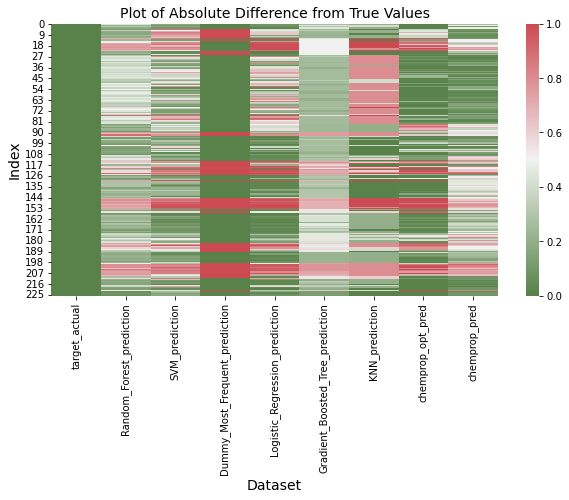

In [165]:
heatmap_cols=[i for i in list(df.columns) if i not in ['mol','cluster']]
df_heatmap=df[heatmap_cols].copy()
actual_values=df_heatmap['target_actual']
for col in df_heatmap.columns:
    df_heatmap[col]=abs(df_heatmap[col]-actual_values)

fig,axes=plt.subplots(1,figsize=(10,5))
cmap=sns.diverging_palette(120, 370, s=60, as_cmap=True)
plot=sns.heatmap(data=df_heatmap,ax=axes,cmap=cmap)
plot.set_xlabel('Dataset',fontsize=14)
plot.set_ylabel('Index',fontsize=14)
plot.set_title('Plot of Absolute Difference from True Values',fontsize=14)
plot.legend

In [166]:
df['target_actual'].value_counts()

1    167
0     59
Name: target_actual, dtype: int64

In [167]:
pred_cols=[i for i in list(df.columns) if i not in ['mol','cluster','target_actual']]

In [195]:
# code inspired by: https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
optimal_thresholds={}
def roc_plot(): 
    pred_cols=[i for i in list(df.columns) if i not in ['mol','cluster','target_actual']]
    plt.figure(figsize=(12,8))
    for col in pred_cols:
        fpr, tpr, thresholds = roc_curve(df['target_actual'],  df[col])
        auc = roc_auc_score(df['target_actual'], df[col]).round(2)
        
        # Calculate the best threshold for chemprop and Gradient tree:
        # Inspired by https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/a
        J = tpr - fpr
        idx = np.argmax(J)
        opt_thresh = thresholds[idx].round(2)
        optimal_thresholds.update({col : opt_thresh})
        
        plt.plot(fpr,tpr,label=f"{col}: auc={auc}, threshold:{opt_thresh}")
        plt.legend(loc=4)
        

        
    plt.title('ROC curves for different models',fontsize=20)
    plt.xlabel('false positive rate',fontsize=16)
    plt.ylabel('true positive rate',fontsize=16)
    plt.show()
    

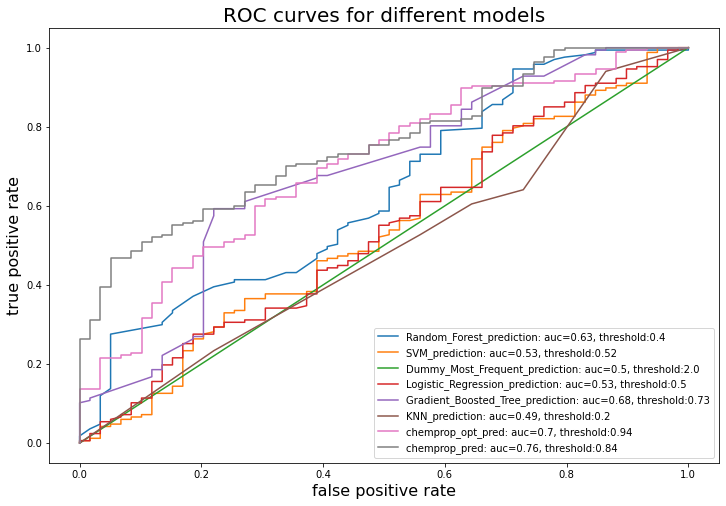

In [196]:
roc_plot()

In [186]:
def eval_metrics(y_true, y_pred,threshold):
    result={}
    # calculate those that want probabilities
    result.update({'log_loss' : log_loss(y_true,y_pred)})
    result.update({'roc_auc': roc_auc_score(y_true, y_pred)})
    # convert to scores based on threshold:
    y_pred=[1 if i>=threshold else 0 for i in y_pred]
    result.update({'accuracy': accuracy_score(y_true,y_pred)})
    result.update({'f1': f1_score(y_true,y_pred)})
    result.update({'matthews_corr': matthews_corrcoef(y_true,y_pred)})
    return(result)

In [194]:
# Scores for optimized threshold:
scores={}
for column in pred_cols:
    y_pred=df[column]
    y_true=df['target_actual']
    threshold=optimal_thresholds[column]
    scores.update({column:eval_metrics(y_true, y_pred,threshold)})
    

pd.DataFrame(scores).round(2).T

,log_loss,roc_auc,accuracy,f1,matthews_corr
Random_Forest_prediction,0.57,0.63,0.77,0.86,0.32
SVM_prediction,0.71,0.53,0.66,0.77,0.09
Dummy_Most_Frequent_prediction,9.02,0.50,0.26,0.00,0.00
Logistic_Regression_prediction,0.96,0.53,0.65,0.76,0.09
Gradient_Boosted_Tree_prediction,0.53,0.68,0.64,0.71,0.33
KNN_prediction,4.16,0.49,0.73,0.84,0.12
chemprop_opt_pred,0.78,0.70,0.63,0.71,0.27
chemprop_pred,0.48,0.76,0.59,0.62,0.38


In [197]:
# Scores with threshold of 0.6
scores={}
for column in pred_cols:
    y_pred=df[column]
    y_true=df['target_actual']
    threshold=optimal_thresholds[column]
    scores.update({column:eval_metrics(y_true, y_pred,0.6)})
    

pd.DataFrame(scores).round(2).T

,log_loss,roc_auc,accuracy,f1,matthews_corr
Random_Forest_prediction,0.57,0.63,0.62,0.72,0.12
SVM_prediction,0.71,0.53,0.64,0.76,0.09
Dummy_Most_Frequent_prediction,9.02,0.50,0.74,0.85,0.00
Logistic_Regression_prediction,0.96,0.53,0.60,0.72,0.03
Gradient_Boosted_Tree_prediction,0.53,0.68,0.70,0.80,0.21
KNN_prediction,4.16,0.49,0.54,0.66,-0.04
chemprop_opt_pred,0.78,0.70,0.74,0.83,0.28
chemprop_pred,0.48,0.76,0.69,0.78,0.23


In [134]:
df_struct=df[['mol','cluster','target_actual','chemprop_opt_pred','Gradient_Boosted_Tree_prediction']].copy()
# use threshold of 0.6 
df_struct['complex_pred']=[1 if i > 0.6 else 0 for i in df_struct['chemprop_opt_pred']]
df_struct['simple_pred']=[1 if i > 0.6 else 0 for i in df_struct['Gradient_Boosted_Tree_prediction']]
df_struct['agree']=df_struct['complex_pred']==df_struct['simple_pred']

In [135]:
disagree=df_struct[df_struct['complex_pred']!=df_struct['simple_pred']]
agree=df_struct[df_struct['complex_pred']==df_struct['simple_pred']]

In [136]:
print(df.shape)
print(agree.shape,disagree.shape)

(226, 11)
(182, 8) (44, 8)


<AxesSubplot:xlabel='cluster', ylabel='agree'>

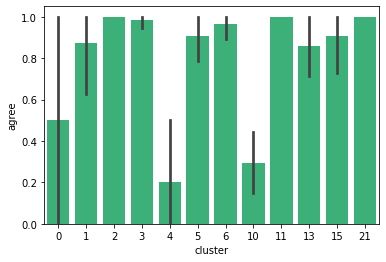

In [137]:
sns.barplot(data=df_struct,x='cluster',y='agree',color='#2ac37a')

In [138]:
from rdkit import DataStructs
from rdkit import Chem
from rdkit.Chem import Draw 
from rdkit.Chem import AllChem
df_struct['molecule']=df['mol'].apply(lambda x: Chem.MolFromSmiles(x))

In [139]:
# Let's have a closer look at some clusters:
cluster_num=4
cluster=df_struct[df_struct['cluster']==cluster_num].copy()
cluster['annotation']=cluster.apply(lambda x:f"Actual Value: {x['target_actual']}\n Simple_Prediction: {x['simple_pred']}\n Complex_Prediction: {x['complex_pred']}",axis=1)
print(cluster.shape)

(10, 10)


In [140]:
#cluster.to_csv('Chemprop_Interpret/cluster_4.csv')

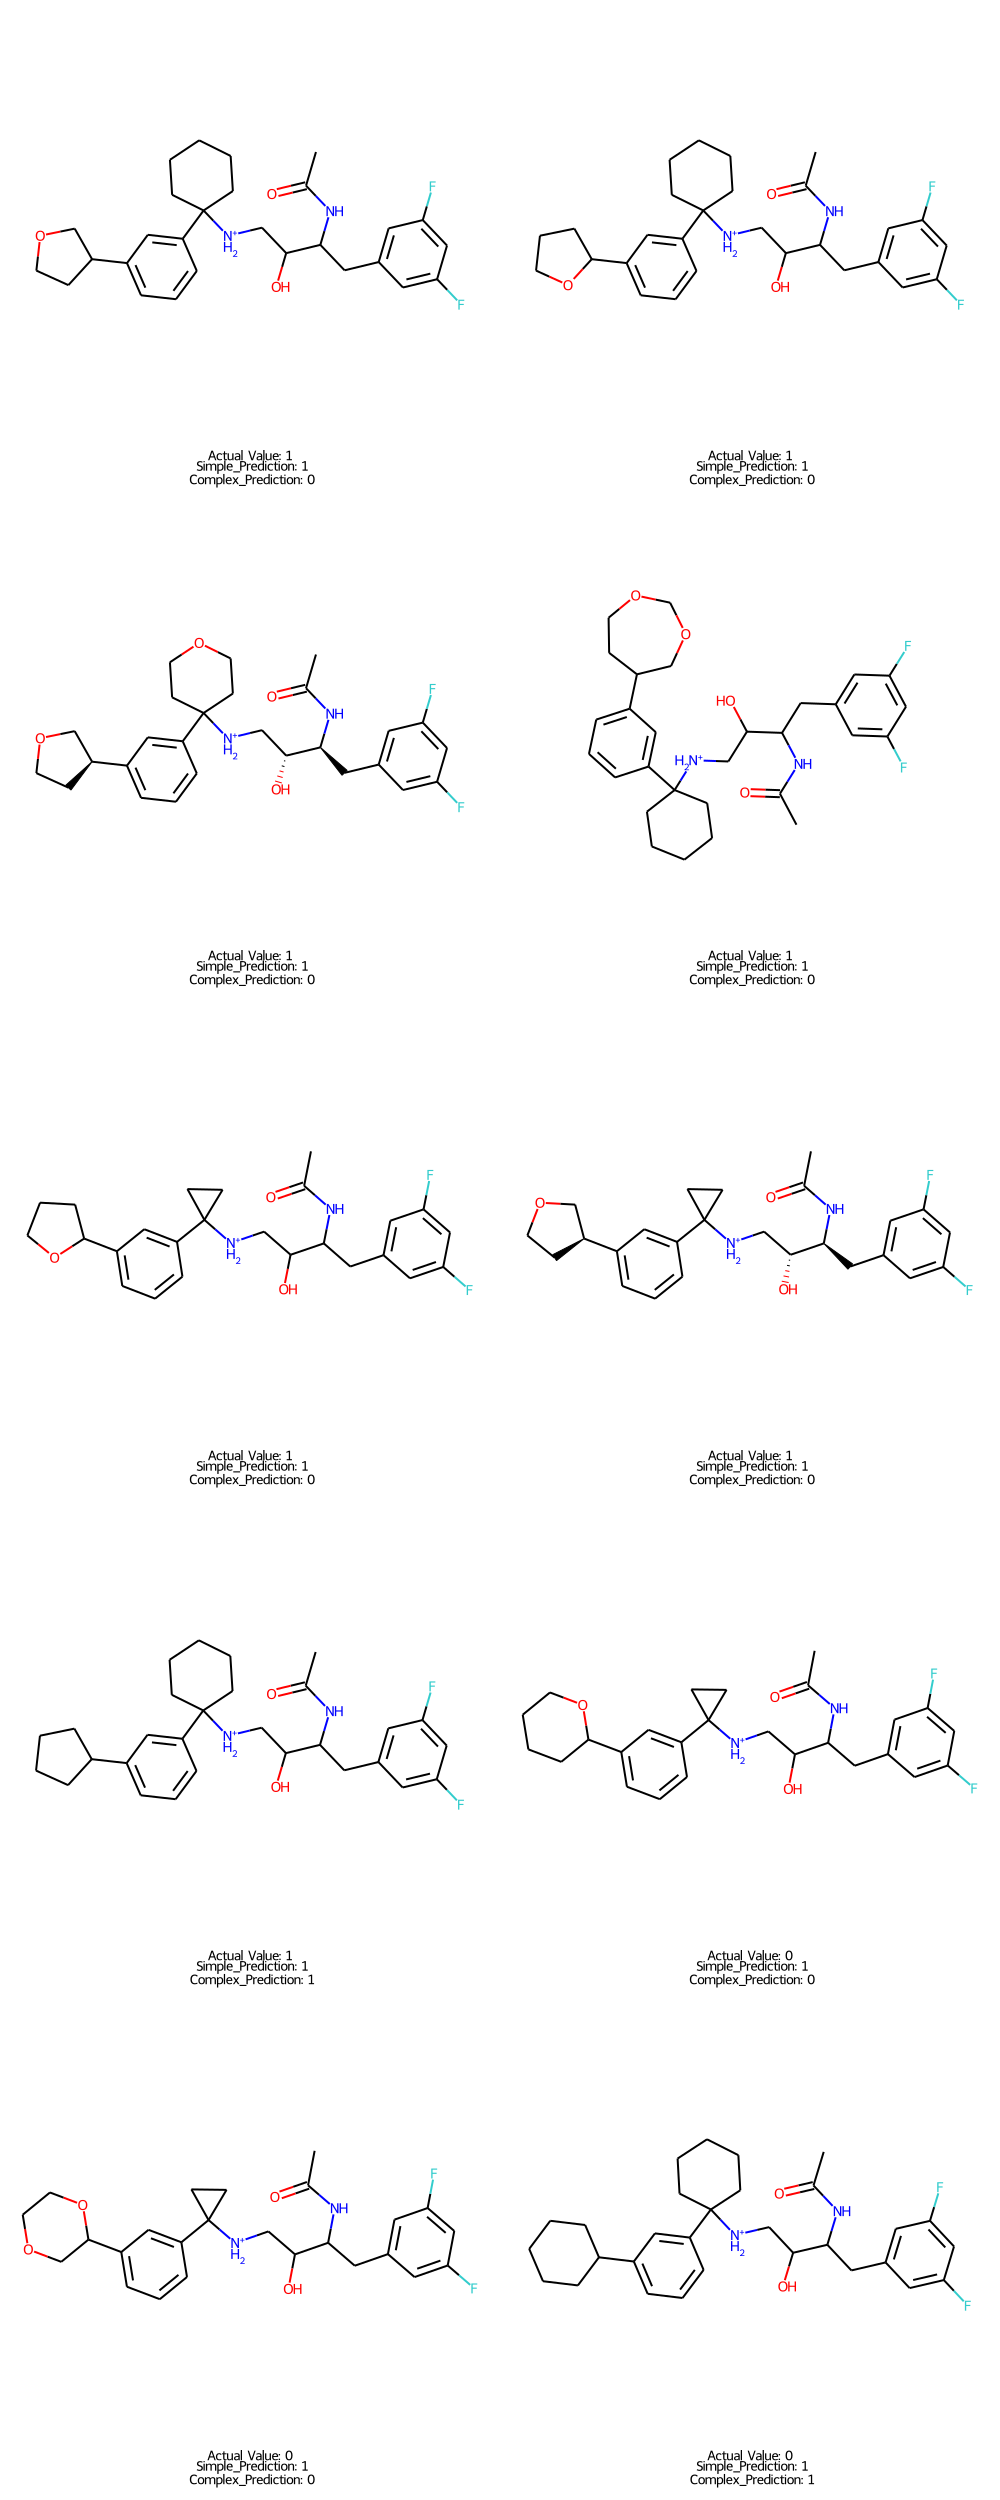

In [141]:
annotations=cluster['annotation'].to_list()
Draw.MolsToGridImage(cluster['molecule'],molsPerRow=2,
                     subImgSize=(500,500),
                    legends=annotations)


In [142]:
# Can we come up with any degree of interpretability?

In [143]:
# Inspired by: https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
with open('Simple_Models/bace-cluster/Gradient_Boosted_Tree_model.pkl','rb') as file:
            clf = pickle.load(file)

bit_names = [f"bit {i}" for i in range(1024)]
importances=clf.feature_importances_
gradient_boosted_imp = pd.Series(importances, index=bit_names)

In [144]:
gradient_boosted_imp.sort_values(ascending=False)[0:20]


bit 444     0.163186
bit 511     0.114918
bit 20      0.096141
bit 964     0.078916
bit 878     0.078092
bit 875     0.053069
bit 455     0.044831
bit 650     0.038851
bit 1015    0.034414
bit 623     0.028544
bit 904     0.028470
bit 79      0.028213
bit 831     0.021173
bit 482     0.017165
bit 706     0.016763
bit 940     0.016152
bit 984     0.015532
bit 393     0.015483
bit 1013    0.014149
bit 389     0.013094
dtype: float64

Text(0.5, 1.0, 'Fingerprint Bit Importances in Gradient Boosted Tree')

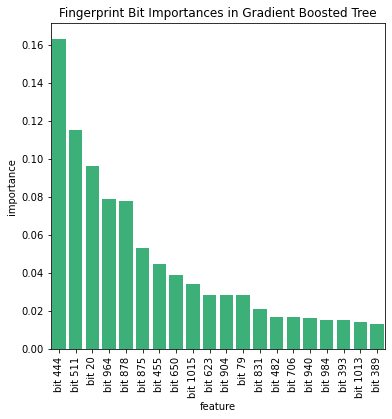

In [145]:
fi_df=pd.DataFrame(gradient_boosted_imp.sort_values(ascending=False)[0:20]).reset_index()
fi_df.columns=['feature','importance']
fig,axes= plt.subplots(1,figsize=(6,6))
sns.barplot(data=fi_df,x='feature',y='importance',axes=axes,color='#2ac37a')
for label in axes.get_xticklabels():
    label.set_rotation(90)
axes.set_title('Fingerprint Bit Importances in Gradient Boosted Tree')

In [146]:
# inspired by: http://rdkit.blogspot.com/2018/10/using-new-fingerprint-bit-rendering-code.html
targets=[444,511,20,964,878,875,455,650,1015,623,904,79,831,482,706,940,984,393,1013,389]
found=[]
mols=df_struct['molecule'].to_list()
for mol in mols:
    bi={}
    fp=AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, bitInfo=bi, nBits=1024)
    for target in targets:
        if bi.get(target) is not None:
            found.append((mol,target,bi))
            targets.remove(target)
        
#found

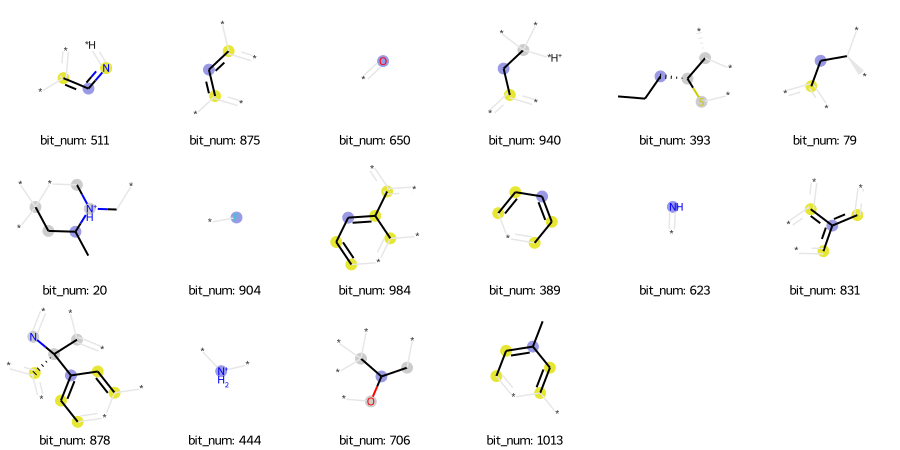

In [147]:
n_fingerprints=24
Draw.DrawMorganBits(found[:n_fingerprints],molsPerRow=6,legends=['bit_num: '+str(x[1]) for x in found][:n_fingerprints])

# Looking at Chemprop intepret results 

Note: Only predictions are generated for the positive class, so this is less helpful in diagnosing false negatives.

In [148]:
cp_interpret_df=pd.read_csv('Chemprop_Interpret/chemprop_interpret.csv')
def smiles_to_mol(smiles):
    try:
        return(Chem.MolFromSmiles(smiles))
    except:
        return(np.nan)

cp_interpret_df['substructure']=cp_interpret_df['substructure'].apply(lambda x: smiles_to_mol(x))
cp_interpret_df['Structure']=cp_interpret_df['Structure'].apply(lambda x: smiles_to_mol(x.strip("'[]'")))

,Structure,prediction,substructure,substructure_activity
0,,0.104,NaN,NaN
1,,0.193,NaN,NaN
6,,0.633,,0.961

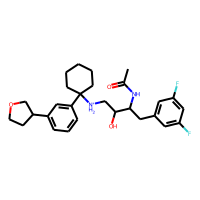
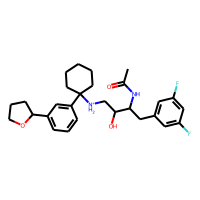
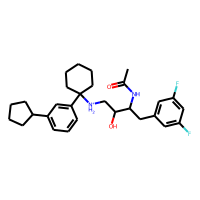
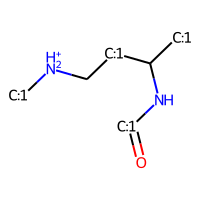

In [154]:
# Issue to show structures:
from IPython.core.display import HTML
PandasTools.RenderImagesInAllDataFrames(images=True)
def show(df):
    return HTML(df.to_html(notebook=True))

show(cp_interpret_df.iloc[[0,1,6]])